In [2]:
# If TensorFlow isn't installed yet
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training samples: 50000, Test samples: 10000


In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [5]:
# Create a Sequential model, which stacks layers linearly
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,836 (659.52 KB)

 Trainable params: 168,836 (659.52 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model with the specified configurations
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model using the augmented training data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4923 - loss: 1.8492 - val_accuracy: 0.4812 - val_loss: 2.0580
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4884 - loss: 1.8778 - val_accuracy: 0.4901 - val_loss: 1.9839
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4913 - loss: 1.8761 - val_accuracy: 0.4838 - val_loss: 2.0060
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4950 - loss: 1.8612 - val_accuracy: 0.4829 - val_loss: 2.0188
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4931 - loss: 1.8621 - val_accuracy: 0.4915 - val_loss: 1.9999
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4948 - loss: 1.8720 - val_accuracy: 0.4863 - val_loss: 2.0334
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4897 - loss: 1.8625 - val_accuracy: 0.4899 - val_loss: 2.0079
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4953 - loss: 1.8575 - 

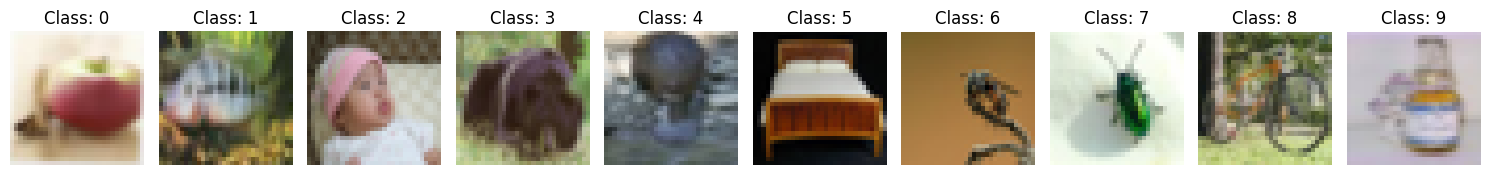

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get 10 unique classes
unique_classes = np.unique(y_train)
selected_classes = unique_classes[:10]  # First 10 class labels

# Get one image per selected class
images = []
labels = []
for cls in selected_classes:
    idx = np.where(y_train == cls)[0][0]
    images.append(x_train[idx])
    labels.append(cls)

# Plot the images
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


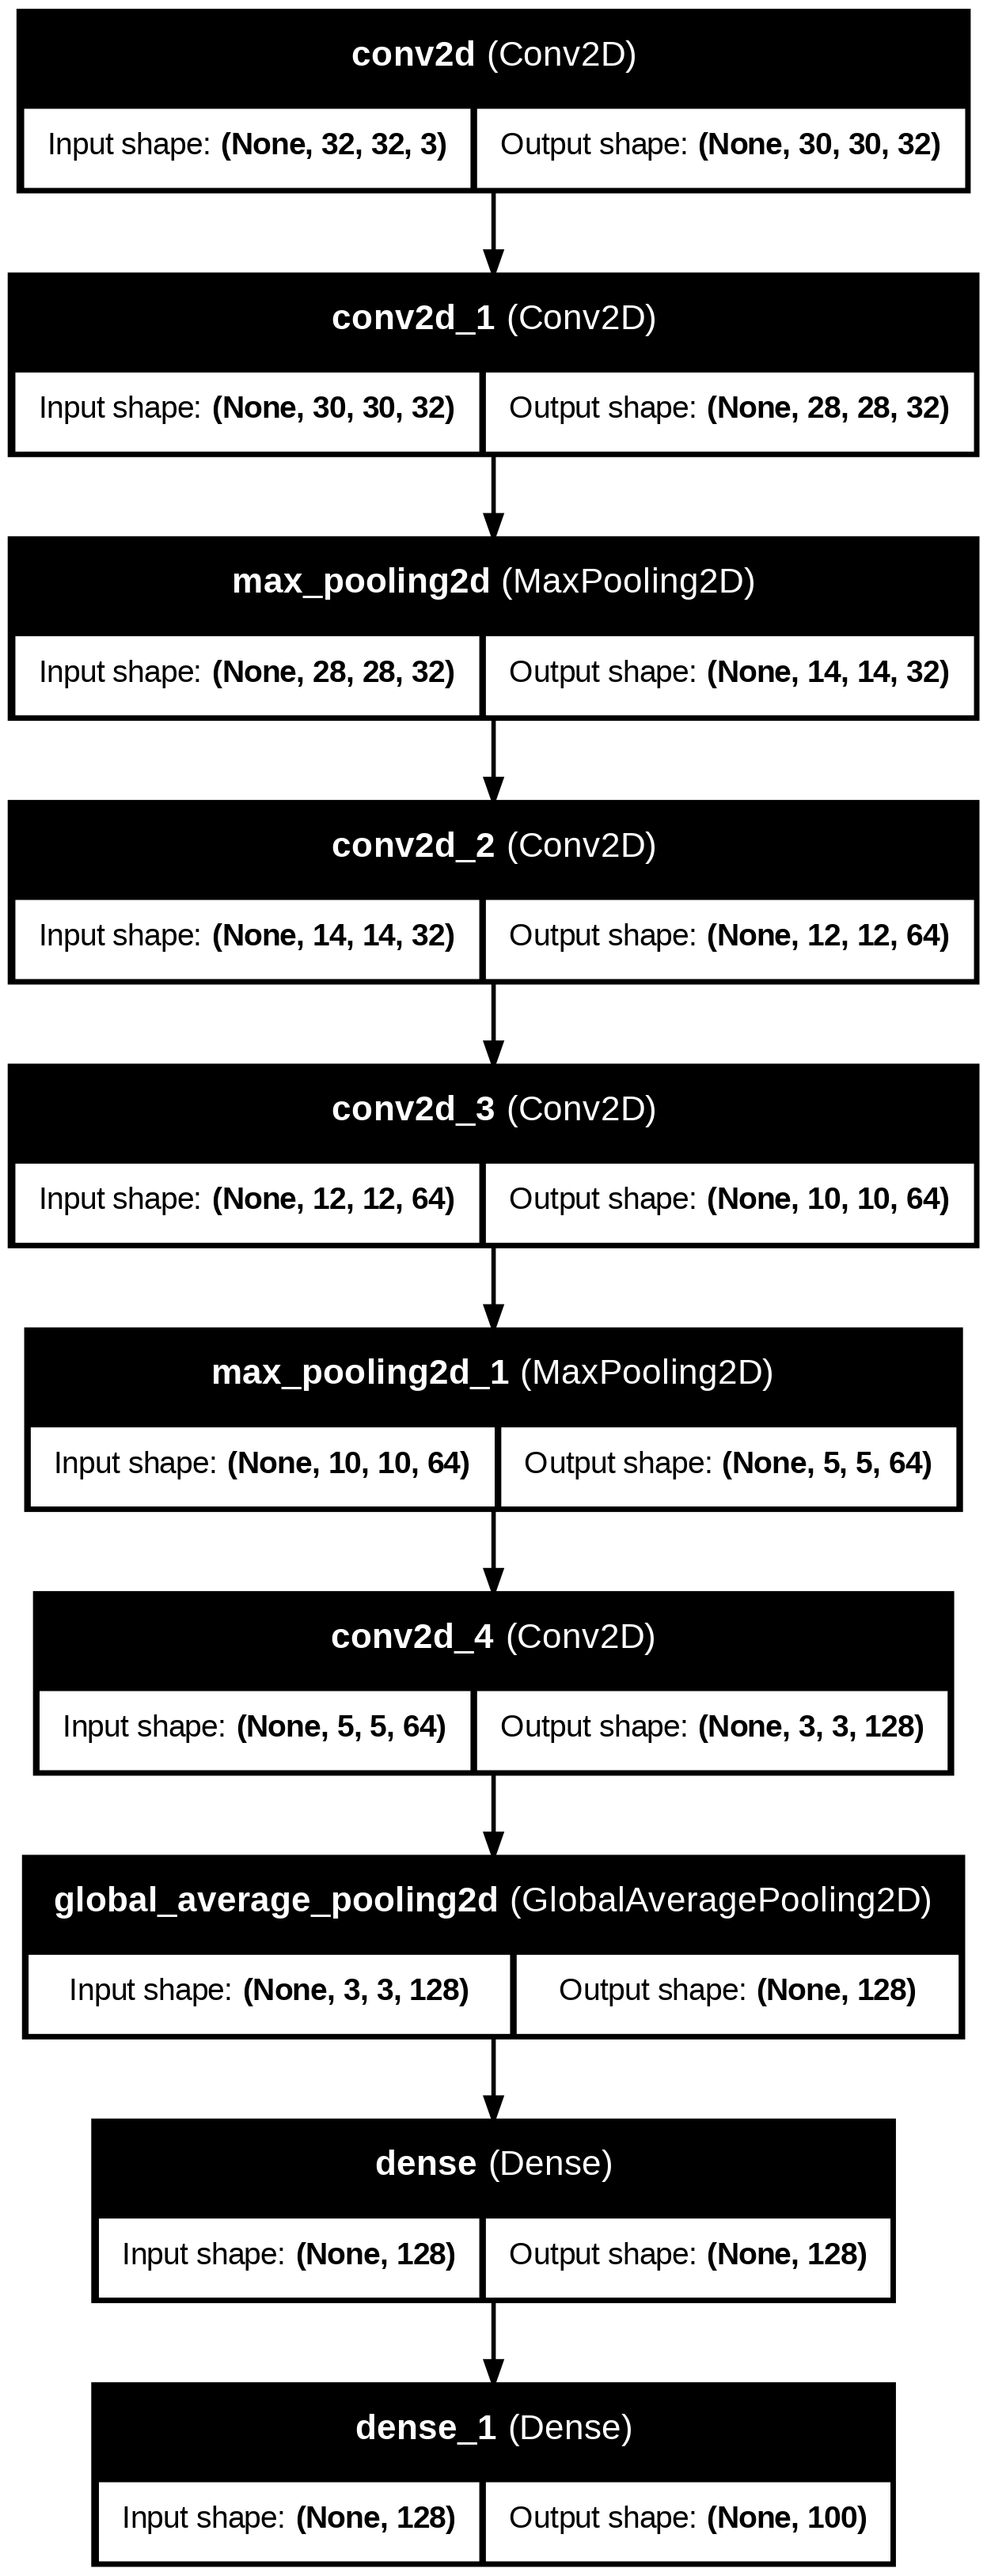

In [11]:
# Install required packages if not already installed
!pip install pydot
!apt-get install -y graphviz  # For Google Colab / Ubuntu; use 'brew install graphviz' on macOS

from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save and display the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
Image('model_architecture.png')